# Degree of Urbanization

The Degree of Urbanization (DoU) is a method for quantifying urbanization using thresholds applied to gridded population data. More information on the DoU can be [found here](https://ghsl.jrc.ec.europa.eu/degurbaDefinitions.php).

In [1]:
import sys
import os
import rasterio

import geopandas as gpd
import pandas as pd

import GOSTurban.UrbanRaster as urban
import GOSTrocks.mapMisc as mapMisc

In [2]:
# Define input population raster
tutorial_folder = "../../data/tutorial_data"
aoi_file = os.path.join(tutorial_folder, "AOI.geojson")
pop_file = os.path.join(tutorial_folder, "wp_2020_1k_AOI.tif")

# Define output files
out_urban = os.path.join(tutorial_folder, "urban_extents.geojson")
out_hd_urban = os.path.join(tutorial_folder, "hd_urban_extents.geojson")

inAOI = gpd.read_file(aoi_file)

# Shouldn't need to execute this unless you change your AOI;
#    you will need to find a global population to extract from
if not os.path.exists(pop_file):
    sys.path.append("../../../gostrocks/src")
    import GOSTRocks.rasterMisc as rMisc

    global_population = "/path/to/global/pop_layer/ppp_2020_1km_Aggregated.tif"
    inR = rasterio.open(global_population)
    rMisc.clipRaster(inR, inAOI, pop_file)

inR = rasterio.open(pop_file)
# Initiate the urban calculator
urban_calculator = urban.urbanGriddedPop(inR)

Cannot find header.dxf (GDAL_DATA is not defined)


## Map of population density in study area

<module 'matplotlib.pyplot' from 'C:\\wbg\\Anaconda3\\envs\\urban_test\\Lib\\site-packages\\matplotlib\\pyplot.py'>

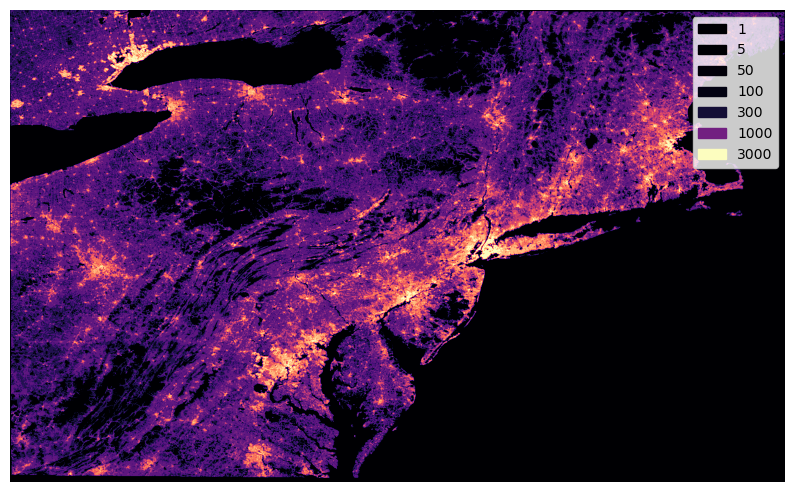

In [3]:
mapMisc.static_map_raster(inR, thresh=[1, 5, 50, 100, 300, 1000, 3000])

# Extract and map urban clusters

In [4]:
# Extract the urban extents (minimum density 300/km2, minimum total population 5000)
urban_extents = urban_calculator.calculateUrban(
    densVal=300, totalPopThresh=5000, smooth=False, queen=False, verbose=True
)
urban_extents["Type"] = 1
urban_extents.head()

14:32:04	: Read in urban data
14:32:05	: Creating Shape 0
14:32:15	: Creating Shape 1000
14:32:27	: Creating Shape 2000
14:32:39	: Creating Shape 3000
14:32:50	: Creating Shape 4000
14:33:01	: Creating Shape 5000
14:33:13	: Creating Shape 6000
14:33:20	: Creating Shape 7000


,ID,Pop,geometry,Type
0,6044,18641.011719,"POLYGON ((-78.75958 44.38292, -78.75958 44.349...",1
1,6045,147162.718750,"POLYGON ((-79.71792 44.42458, -79.71792 44.416...",1
2,6046,8065.728516,"POLYGON ((-79.90958 44.33292, -79.90958 44.324...",1
3,6047,18561.923828,"POLYGON ((-79.55125 44.36625, -79.55125 44.357...",1
4,6049,11521.957031,"POLYGON ((-69.78458 44.34125, -69.78458 44.316...",1


C:\wbg\Anaconda3\envs\urban_test\Lib\site-packages\GOSTrocks\mapMisc.py:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for label, mdata in v_data.groupby('tomap'):


<module 'matplotlib.pyplot' from 'C:\\wbg\\Anaconda3\\envs\\urban_test\\Lib\\site-packages\\matplotlib\\pyplot.py'>

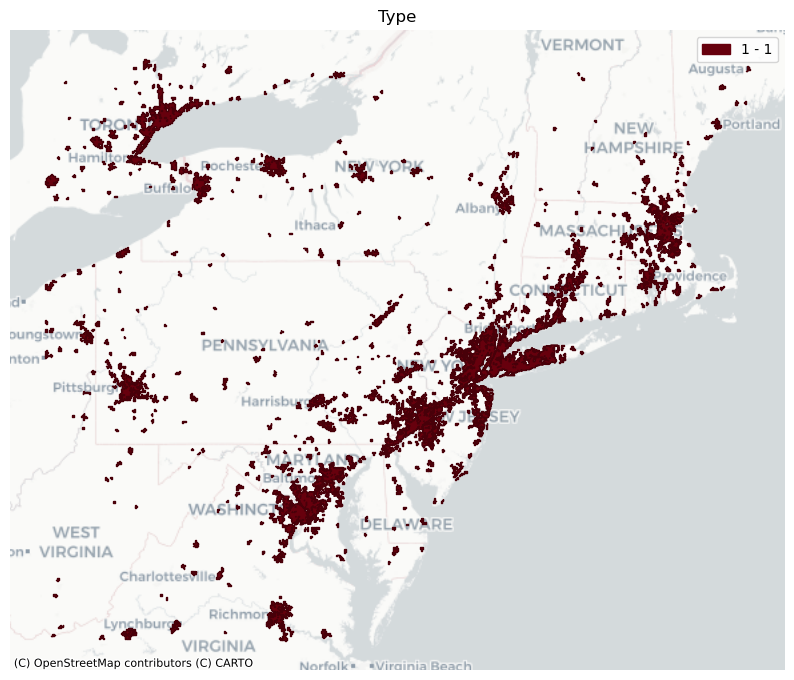

In [5]:
# Map of urban extents
mapMisc.static_map_vector(urban_extents, "Type")

# Extract and map high-density urban extents

In [6]:
# Extract the high density urban extents (minimum density 1500/km2, minimum total population 50000)
hd_urban_extents = urban_calculator.calculateUrban(
    densVal=1500,
    totalPopThresh=50000,
    smooth=True,
    queen=True,  # high density extents use queen's case contiguity, and
    verbose=True,
)  # High density extents have hole smoothing applied.
hd_urban_extents["Type"] = 2
hd_urban_extents.head()

14:33:28	: Read in urban data
14:33:28	: Creating Shape 0
14:33:38	: Creating Shape 1000


C:\wbg\Anaconda3\envs\urban_test\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\wbg\Anaconda3\envs\urban_test\Lib\site-packages\GOSTurban\UrbanRaster.py:404: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  xxGeom["geometry"] = xxGeom.buffer((popRaster.res[0] / 2))


,geometry,ID,Pop,Type
group,,,,
0,"POLYGON ((-79.47625 44.07875, -79.43458 44.078...",1920,8.631687e+04,2
1,"POLYGON ((-78.87625 43.95375, -78.83458 43.953...",1921,2.058095e+05,2
2,"POLYGON ((-79.04292 43.90375, -79.00958 43.903...",1922,1.838872e+05,2
3,"POLYGON ((-79.45958 43.93708, -79.45125 43.937...",1924,4.903070e+06,2
4,"POLYGON ((-79.87625 43.54542, -79.85958 43.545...",1925,8.413600e+04,2


C:\wbg\Anaconda3\envs\urban_test\Lib\site-packages\GOSTrocks\mapMisc.py:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for label, mdata in v_data.groupby('tomap'):


<module 'matplotlib.pyplot' from 'C:\\wbg\\Anaconda3\\envs\\urban_test\\Lib\\site-packages\\matplotlib\\pyplot.py'>

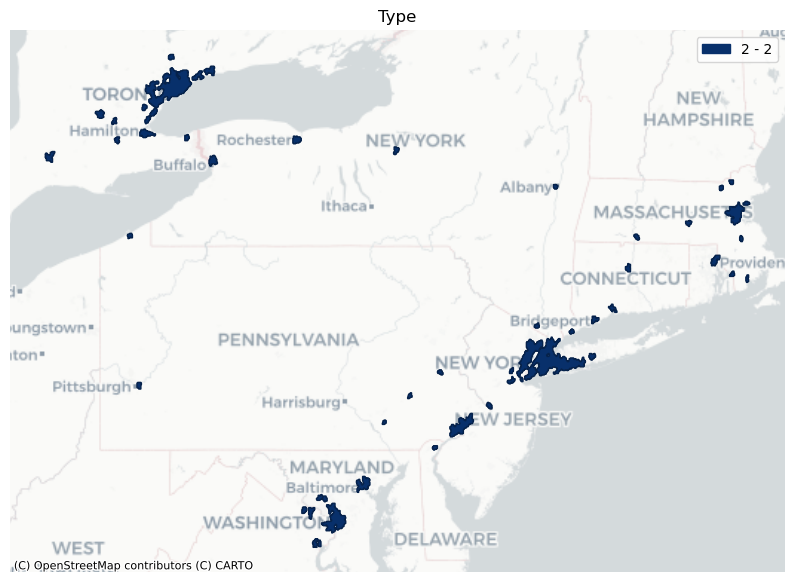

In [7]:
mapMisc.static_map_vector(hd_urban_extents, "Type", colormap="Blues")

## Map combined extents and write output

C:\wbg\Anaconda3\envs\urban_test\Lib\site-packages\GOSTrocks\mapMisc.py:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for label, mdata in v_data.groupby('tomap'):


<module 'matplotlib.pyplot' from 'C:\\wbg\\Anaconda3\\envs\\urban_test\\Lib\\site-packages\\matplotlib\\pyplot.py'>

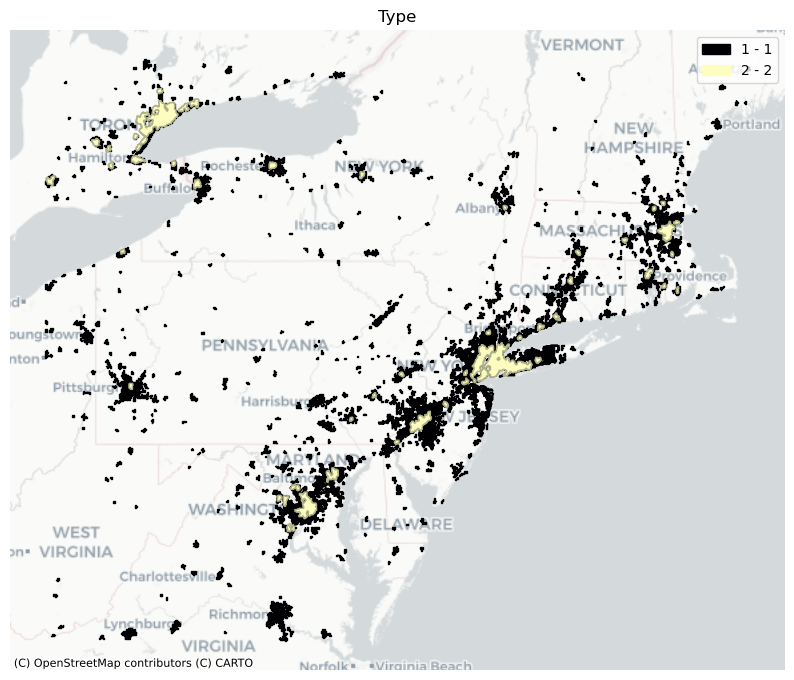

In [8]:
combo_extents = pd.concat([urban_extents, hd_urban_extents])
mapMisc.static_map_vector(combo_extents, "Type", colormap="magma")

In [9]:
urban_extents.to_file(out_urban, driver="GeoJSON")
hd_urban_extents.to_file(out_hd_urban, driver="GeoJSON")